In [1]:
pwd

'/media/student1/NewVolume/MR_Reconstruction/code/fastmri'

In [2]:
from data.my_transforms import SquareDataTransform, NoTransform, transforms
from common.utils import to_cplx, tensor_to_complex_np
import numpy as np
import torch
from tqdm import tqdm
import h5py

In [3]:
from matplotlib import pyplot as plt

In [4]:
from models.dautomap.train_dautomap import create_data_loaders, SliceData

In [5]:
from pathlib import Path
from collections import namedtuple

In [6]:
args = {'center_fractions':[0.08],'accelerations':[4],'challenge':'multicoil',
       'data_path':Path('/media/student1/NewVolume/MR_Reconstruction/datasets/fastmri/'),
       'resolution':320,
       'sample_rate':0.01,
       'batch_size':3,
        'device':'cuda',
        'data_parallel':False,
        'residual':False,
        'dcblock':False,
        'in_chans':1,
        'out_chans':1,
        'num_chans':32,
        
        'num_pool_layers':4,
        'drop_prob':0
       }
# d_named = namedtuple("Employee", d.keys())(*d.values())

argsobj = namedtuple('args',args.keys())(*args.values())

In [7]:
from models.dautomap.train_dautomap import create_data_loaders, build_model, build_dautomap


In [8]:
train_loader, dev_loader = create_data_loaders(argsobj)

In [9]:
for ksp,ksp_zf,inp_stack,inp, tgt in train_loader:
    print(ksp.shape,ksp.dtype)
    break

torch.Size([3, 30, 320, 320]) torch.float32


In [10]:
inp_stack.shape
img_npy0 =inp_stack[0,0,:,0].numpy()+1j*inp_stack[0,1,:,:].numpy()
print(img_npy0.shape)

(320, 320)


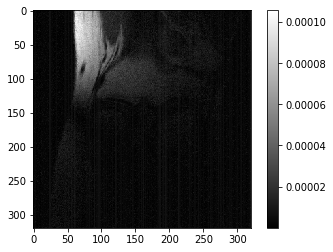

In [15]:
plt.imshow(np.abs(img_npy0),cmap='gray')
plt.colorbar()

torch.Size([3, 320, 320])


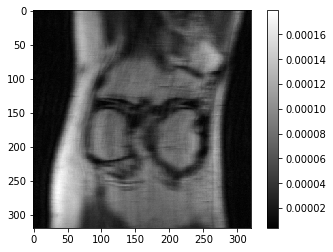

In [16]:
print(inp.shape)
plt.imshow(inp[0,:,:],cmap='gray')
plt.colorbar()

torch.Size([3, 320, 320])


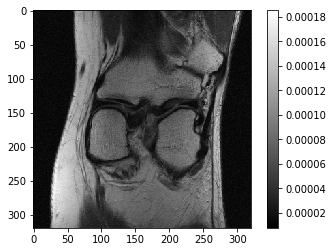

In [17]:
print(tgt.shape)
plt.imshow(tgt[0,:,:],cmap='gray')
plt.colorbar()

In [14]:
img_npy0 =image_square0[:,:,0].numpy()+1j*image_square0[:,:,1].numpy()
print(img_npy0.shape)

NameError: name 'image_square0' is not defined

In [ ]:
file = '/media/student1/NewVolume/MR_Reconstruction/datasets/fastmri/multicoil_train/file1001862.h5'
hf = h5py.File(file)

In [ ]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

In [ ]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)

In [ ]:
volume_image = hf['reconstruction_rss'][()]
print("rss_image_shape",volume_image.shape)
image = volume_image[20]
print("image",image.shape)
plt.imshow(image,cmap='gray')
plt.colorbar()


In [ ]:
kspace_rect = transforms.to_tensor(volume_kspace[20])
print(kspace_rect.shape)
image_rect = transforms.ifft2(kspace_rect)    ##rectangular FS image

image_square = transforms.complex_center_crop(image_rect, (argsobj.resolution, argsobj.resolution))  ##cropped to FS square image
image_square_abs = transforms.complex_abs(image_square) 
image_square_abs.shape

In [ ]:
print(image_square_abs.shape)
image_square_rss = transforms.root_sum_of_squares(image_square_abs, dim=0)
image_square_rss.shape

In [ ]:
plt.imshow(image_square_rss,cmap='gray')
plt.colorbar()

In [ ]:
error = (image_square_rss-transforms.to_tensor(image))
print(error.shape)
plt.imshow(error,cmap='gray')
plt.colorbar()

# testing of dataset 

In [ ]:
ds = SliceData(root=argsobj.data_path / f'{argsobj.challenge}_train',
              transform = NoTransform(),
              sample_rate = argsobj.sample_rate,
              challenge = argsobj.challenge)


In [ ]:
ksp_1 = ds[200]

In [ ]:
ksp_1.shape,ksp_1.dtype

In [ ]:
kspace_rect = transforms.to_tensor(ksp_1)
image_rect = transforms.ifft2(kspace_rect)    ##rectangular FS image

image_square = transforms.complex_center_crop(image_rect, (argsobj.resolution, argsobj.resolution))  ##cropped to FS square image
slice_image_abs = transforms.complex_abs(image_square) 

In [ ]:
image_square.shape

In [ ]:
print(slice_image_abs.shape)
slice_image_rss = transforms.root_sum_of_squares(slice_image_abs, dim=0)
slice_image_rss.shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(slice_image_rss,cmap='gray')
plt.colorbar()

In [ ]:
from data.my_transforms import C3Convert, ifft_c3, fft_c3, ifft_c3

c3obj = C3Convert((argsobj.resolution,argsobj.resolution))

In [ ]:
# kspace_square = c3obj.apply(transforms.fft2(image_square))  ##kspace of square iamge
kspace_square = torch.fft(image_square ,2 , normalized = True)
kspace_square.shape

In [ ]:
kspace_square0 = kspace_square[10,:,:,:]
image_square0 = (torch.ifft(kspace_square0,2,normalized=True))
print(image_square0.shape)
img_npy0 =image_square0[:,:,0].numpy()+1j*image_square0[:,:,1].numpy()
print(img_npy0.shape)
# plt.imshow(img_npy0[0,:,:])

In [ ]:
img_npy0 = np.abs(img_npy0)
img_npy0.shape
plt.imshow(img_npy0[:,:],cmap='gray')
plt.colorbar()

In [ ]:
kspace_square2=[]
len(kspace_square[:,0,0,0])

In [ ]:
kspace_square2=[]
for i in tqdm(range(len(kspace_square[:,0,0,0]))):
    
#     ksp = torch.stack((kspace_square2[0,:,:],kspace_square2[1,:,:]),dim=2)
#     torch.cat((kspace_square[i,:,:,0],kspace_square2),dim=0)
#     torch.cat((kspace_square2,kspace_square[i,:,:,1]),dim=0)
    kspace_square2.append(kspace_square[i,:,:,0])
    kspace_square2.append(kspace_square[i,:,:,1])
   


In [ ]:
len(kspace_square2)
kspace_square2 = torch.stack(kspace_square2)
kspace_square2.shape

In [ ]:
ksp =[]
ksp = torch.stack((kspace_square2[0,:,:],kspace_square2[1,:,:]),dim=2)
# len(ksp)
# ksp.append(kspace_square2[1,:,:])
# len
# ksp = ksp.unsqueeze(0)
# ksp.shape
# ksp = torch.stack(ksp,kspace_square2[1,:,:])



# image_square_test = c3obj.apply(transforms.ifft2(image_square))

In [ ]:
ksp=ksp.unsqueeze(0)
print(ksp.shape)
# ksp = ksp.permute(0,2,3,1)
# print(ksp.shape)


In [ ]:
image_square = (torch.ifft(ksp,2,normalized=True))

In [ ]:
image_square.shape
# plt.imshow(image_square[0,:,:,1])

In [ ]:
img_npy =image_square[:,:,:,0].numpy()+1j*image_square[:,:,:,1].numpy()

In [ ]:
img_npy.shape
image_square_abs = np.abs(img_npy[0,:,:])
# image_square_abs.shape

In [ ]:
plt.imshow(image_square_abs,cmap='gray')
plt.colorbar()

In [ ]:
# kspace_square2 = kspace_square.reshape(30,320,320)

In [ ]:
# kspace_square2.shape
# kspace_square2 = kspace_square2.unsqueeze(0)
# kspace_square2.shape

In [ ]:
# a1=[torch.rand(2,2),torch.rand(2,2)]
# a1[0].shape

In [ ]:
# a = []
# for i in range(100000):
#     a.append(torch.rand(1, 100, 100))

# b = torch.Tensor(100000, 100, 100)
# c=torch.cat(a, out=b)

In [ ]:
len(b)

In [ ]:
a=torch.Tensor([[10,20],[30,40]])
a.shape

In [ ]:
b=torch.Tensor([[100,200],[300,400]])
b.shape

In [ ]:
c=torch.append((a,b),dim=0)
c.shape

In [ ]:

b.shape

# Fourier initialization of domain transform of dAUTOMAP

In [ ]:
from models.dautomap.train_dautomap import build_model

In [ ]:
model_dautomap = build_model(argsobj)
model_dautomap

In [ ]:
mdl = model_dautomap.domain_transform
mdl

In [ ]:
kspace_square2.shape

In [ ]:
out = mdl(kspace_square2.unsqueeze(0).cuda())
out.shape


In [ ]:
out_image_rss = transforms.root_sum_of_squares(out, dim=0)
out_image_rss.shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(out_image_rss.detach().cpu().numpy(),cmap='gray')
plt.colorbar()

In [ ]:
optimizer = torch.optim.RMSprop(mdl.parameters(),lr=0.001)#,alpha=0.99,eps=1e-08,weight_decay=0,momentum=0,centered=False)
import torch.nn.functional as F
v=[]
for _  in tqdm(range(500)):
    output = mdl(kspace_square2.cuda()).squeeze(0)
    print(output.shape)
    out_image_rss = transforms.root_sum_of_squares(output, dim=0)
#     target_image_rss = transforms.root_sum_of_squares(target , dim=0).squeeze(0)
    

#     print("cntr=",cntr)
#     print("output",out_image_rss.shape)
#     print("target",slice_image_rss.shape)
    
    
    loss = F.l1_loss(out_image_rss,slice_image_rss.cuda()*10000)
#     print("loss",loss)
    v.append(loss.item())
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

In [ ]:
plt.plot(v)

In [ ]:
output = mdl(kspace_square2.cuda()).squeeze(0)
out_image_rss = transforms.root_sum_of_squares(output, dim=0)
plt.imshow(out_image_rss.detach().cpu().numpy(),cmap='gray')
plt.colorbar()

In [ ]:
model_dautomap.domain_transform = mdl

In [ ]:
output = model_dautomap(kspace_square2.cuda()).squeeze(0)
output.shape

In [ ]:
plt.imshow(output[0,:,:].detach().cpu().numpy())
plt.colorbar()

# training the dAUTOMAP after initializing the domain transform with Fourier weights

In [ ]:
out_image_rss = transforms.root_sum_of_squares(output, dim=0)
out_image_rss.shape
plt.imshow(out_image_rss.detach().cpu().numpy(),cmap='gray')
plt.colorbar()

In [ ]:
optimizer = torch.optim.Adam(model_dautomap.parameters(),lr=0.001)

v = []
for _ in tqdm(range(200)):
    output = model_dautomap(kspace_square2.cuda()).squeeze(0).squeeze(0)
#     out_image_rss = transforms.root_sum_of_squares(output, dim=0)
#     target_image_rss = transforms.root_sum_of_squares(target , dim=0).squeeze(0)

#     print("cntr=",cntr)
#     print("output",out_image_rss.max())
#     print("target",slice_image_rss.max())
    
    
    loss = F.l1_loss(output,slice_image_rss.cuda()*100000)
#     print("loss",loss.item())
    v.append(loss.item())
#     loss.append(loss.item())
    
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

In [ ]:
plt.plot(v)

In [ ]:
out = model_dautomap(kspace_square2.cuda()).squeeze(0).squeeze(0)
out.shape
plt.imshow(out.detach().cpu().numpy(),cmap = 'gray')
plt.colorbar()

In [ ]:
op =model_dautomap.domain_transform(kspace_square2.cuda()).squeeze(0)
op.shape

In [ ]:
op_rss  = transforms.root_sum_of_squares(op, dim=0)

In [ ]:
print(op_rss.shape)
plt.imshow(op_rss.detach().cpu().numpy(),cmap='gray')
plt.colorbar()

# testing on Zero-filled k-space

In [ ]:
from common.subsample import MaskFunc
train_mask = MaskFunc(argsobj.center_fractions, argsobj.accelerations)

In [ ]:
image_square.shape

In [ ]:
masked_kspace_square, mask = transforms.apply_mask(kspace_square, train_mask)
masked_kspace_square.shape

In [ ]:
us_image_sq = (ifft_c3(masked_kspace_square))    ##rectangular FS image
print(us_image_sq.shape)

In [ ]:
us_image_sq_abs = transforms.complex_abs(us_image_sq)
us_image_sq_abs.shape

In [ ]:
us_image_sq_rss = transforms.root_sum_of_squares(us_image_sq_abs,dim= 0)
us_image_sq_rss.shape

In [ ]:
plt.imshow(us_image_sq_rss,cmap = 'gray')
plt.colorbar()

In [ ]:
masked_kspace_square2 = masked_kspace_square.reshape(30,320,320)
masked_kspace_square2 = masked_kspace_square2.unsqueeze(0)
masked_kspace_square2.shape

In [ ]:
# model = model.cpu()

In [ ]:
# model2  = build_model(argsobj)
# model2

In [ ]:
model_dautomap.domain_transform = mdl

In [ ]:
out = model_dautomap.domain_transform(masked_kspace_square2.cuda())

In [ ]:
out = out.squeeze(0)
out.shape

In [ ]:
out_rss = transforms.root_sum_of_squares(out,dim= 0)
out_rss.shape

In [ ]:
plt.imshow(out_rss.detach().cpu().numpy(),cmap = 'gray')
plt.colorbar()

# overfitting the dual-encoder unet!

In [ ]:
from torch import nn

In [ ]:
class ConvBlock(nn.Module):
    """
    A Convolutional Block that consists of two convolution layers each followed by
    instance normalization, relu activation and dropout.
    """

    def __init__(self, in_chans, out_chans, drop_prob):
        """
        Args:
            in_chans (int): Number of channels in the input.
            out_chans (int): Number of channels in the output.
            drop_prob (float): Dropout probability.
        """
        super().__init__()

        self.in_chans = in_chans
        self.out_chans = out_chans
        self.drop_prob = drop_prob

        self.layers = nn.Sequential(
            nn.Conv2d(in_chans, out_chans, kernel_size=3, padding=1),
            nn.InstanceNorm2d(out_chans),
            nn.ReLU(),
            nn.Dropout2d(drop_prob),
            nn.Conv2d(out_chans, out_chans, kernel_size=3, padding=1),
            nn.InstanceNorm2d(out_chans),
            nn.ReLU(),
            nn.Dropout2d(drop_prob)
        )

    def forward(self, input):
        """
        Args:
            input (torch.Tensor): Input tensor of shape [batch_size, self.in_chans, height, width]
        Returns:
            (torch.Tensor): Output tensor of shape [batch_size, self.out_chans, height, width]
        """
        return self.layers(input)

    def __repr__(self):
        return f'ConvBlock(in_chans={self.in_chans}, out_chans={self.out_chans}, ' \
            f'drop_prob={self.drop_prob})'


In [ ]:
class UnetModelParallelEncoder(nn.Module):
    """
    PyTorch implementation of a U-Net model.
    This is based on:
        Olaf Ronneberger, Philipp Fischer, and Thomas Brox. U-net: Convolutional networks
        for biomedical image segmentation. In International Conference on Medical image
        computing and computer-assisted intervention, pages 234–241. Springer, 2015.
    """

    def __init__(self, in_chans, out_chans, chans, num_pool_layers, drop_prob):
        """
        Args:
            in_chans (int): Number of channels in the input to the U-Net model.
            out_chans (int): Number of channels in the output to the U-Net model.
            chans (int): Number of output channels of the first convolution layer.
            num_pool_layers (int): Number of down-sampling and up-sampling layers.
            drop_prob (float): Dropout probability.
        """
        super().__init__()

        self.in_chans = in_chans
        self.out_chans = out_chans
        self.chans = chans
        self.num_pool_layers = num_pool_layers
        self.drop_prob = drop_prob

        self.down_sample_layers1 = nn.ModuleList([ConvBlock(in_chans, chans, drop_prob)])
        self.down_sample_layers2 = nn.ModuleList([ConvBlock(in_chans, chans, drop_prob)])

        ch = chans
        for i in range(num_pool_layers - 1):
            self.down_sample_layers1 += [ConvBlock(ch, ch * 2, drop_prob)]
            ch *= 2

        ch = chans
        for i in range(num_pool_layers - 1):
            self.down_sample_layers2 += [ConvBlock(ch, ch * 2, drop_prob)]
            ch *= 2

        self.conv = ConvBlock(ch*2, ch, drop_prob)

        
        self.up_sample_layers = nn.ModuleList()
        for i in range(num_pool_layers - 1):
            self.up_sample_layers += [ConvBlock(ch * 3, ch // 2, drop_prob)]
            ch //= 2
        self.up_sample_layers += [ConvBlock(ch * 3, ch, drop_prob)]
        self.conv2 = nn.Sequential(
            nn.Conv2d(ch, ch // 2, kernel_size=1),
            nn.Conv2d(ch // 2, out_chans, kernel_size=1),
            nn.Conv2d(out_chans, out_chans, kernel_size=1),
        )

    def forward(self, input1,input2):
        """
        Args:
            input (torch.Tensor): Input tensor of shape [batch_size, self.in_chans, height, width]
        Returns:
            (torch.Tensor): Output tensor of shape [batch_size, self.out_chans, height, width]
        """
        stack1 = []
        stack2 = []
        output1 = input1
        output2 = input2

        # Apply down-sampling layers
        for layer in self.down_sample_layers1:
            # print("output1",output1.shape)
            output1 = layer(output1)
            stack1.append(output1)
            output1 = F.max_pool2d(output1, kernel_size=2)
            #print (output1.shape)

        for layer in self.down_sample_layers2:
            output2 = layer(output2)
            stack2.append(output2)
            output2 = F.max_pool2d(output2, kernel_size=2)
            #print (output2.shape)

        output = torch.cat([output1,output2],dim=1)
        #print (output.shape)
        output = self.conv(output)

        # Apply up-sampling layers
        for layer in self.up_sample_layers:
            output = F.interpolate(output, scale_factor=2, mode='bilinear', align_corners=False)
            output = torch.cat([output, stack1.pop(),stack2.pop()], dim=1)
            #print (output.shape)
            output = layer(output)
        return self.conv2(output)


In [ ]:
model_dualencoderunet = UnetModelParallelEncoder(argsobj.in_chans,argsobj.out_chans,argsobj.num_chans,argsobj.num_pool_layers,argsobj.drop_prob)

In [ ]:
model_dualencoderunet

In [ ]:
class dAUTOMAPDualEncoderUnet(nn.Module):
    def __init__(self,model1,model2):
        super(dAUTOMAPDualEncoderUnet,self).__init__()
        self.model1 = model1
        self.model2 = model2

    def forward(self,input_kspace,input):

        # input_kspace = input_kspace.permute(0,3,1,2)
        
        dautomap_pred = self.model1(input_kspace)

        # print("dautomap_pred",dautomap_pred.shape)
        # print((dautomap_pred.shape))
        
        # dautomap_pred = F.pad(dautomap_pred,(5,5,5,5),"constant",0)
#         dautomap_pred_abs = complex_abs(dautomap_pred.permute(0,2,3,1)).unsqueeze(1) 
        # print("dautomap_pred",dautomap_pred.shape)

        output = self.model2(dautomap_pred,input)

        return dautomap_pred,output


In [ ]:
model = dAUTOMAPDualEncoderUnet(model_dautomap,model_dualencoderunet).cuda()

In [ ]:
model

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
masked_kspace_square2 = masked_kspace_square2.cuda()
us_image_sq_rss = us_image_sq_rss.unsqueeze(0).unsqueeze(0)
model = model.cuda()
slice_image_rss = slice_image_rss.unsqueeze(0).unsqueeze(0).cuda()
print("target",slice_image_rss.shape)
print("input kspace",masked_kspace_square2.shape)
print("us_image_sq_rss",us_image_sq_rss.shape)

In [ ]:


v = []
for _ in tqdm(range(1000)):
#      print("cntr=",cntr)
    print("target",slice_image_rss.shape)
    print("input kspace",masked_kspace_square2.shape)
    print("us_image_sq_rss",us_image_sq_rss.shape)
    pred,output = model(masked_kspace_square2.cuda(),us_image_sq_rss.cuda())
    
#     out_image_rss = transforms.root_sum_of_squares(output, dim=0)
#     target_image_rss = transforms.root_sum_of_squares(target , dim=0).squeeze(0)
    output = output.unsqueeze(0).unsqueeze(0)
    print("output",out_image_rss.shape)


   
    
    
    loss = F.l1_loss(output,slice_image_rss*100000)
    print("loss",loss.item())
    v.append(loss.item())
#     loss.append(loss.item())
    
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

In [ ]:
plt.plot(v)

In [ ]:
pred,output = model(masked_kspace_square2.cuda(),us_image_sq_rss.cuda())

In [ ]:
output.shape

In [ ]:
plt.imshow(output[0,0,:,:].detach().cpu().numpy(),cmap='gray')
plt.colorbar()

In [ ]:
out_image_rss.shape
plt.imshow(slice_image_rss[0,0,:,:].detach().cpu().numpy(),cmap='gray')
plt.colorbar()


In [ ]:
pred.shape

In [ ]:
plt.imshow(pred[0,0,:,:].detach().cpu().numpy(),cmap='gray')
plt.colorbar()

In [ ]:
op = model.model1.domain_transform(masked_kspace_square2.cuda()).squeeze(0)
op.shape

In [ ]:
op_rss = transforms.root_sum_of_squares(op,dim= 0)
op_rss.shape

In [ ]:
plt.imshow(op_rss.detach().cpu().numpy(),cmap='gray')
plt.colorbar()
